In [1]:
import pandas as pd
import dppd, dppd_plotnine
dp, X = dppd.dppd()

In [9]:
# from https://repology.org/repositories/statistics 20240823
df = pd.read_html("statistics")
df  = df[0]
df.columns = [x[1] for x in df.columns]

In [24]:
df.sort_values('Total').tail(50)

,Repository,Total,N/u,Newest,Newest.1,Outdated,Outdated.1,Unique,Unique.1,Problematic,Problematic.1,Potentially vulnerable,Potentially vulnerable.1,Maintainers,Problems
120,Fedora 32,21457,19010,6615,34.1%,12760,65.7%,2447.0,11.4%,339,1.6%,898,4.19%,?,4759
118,Fedora 30,21489,19081,6530,33.8%,12725,65.9%,2408.0,11.2%,341,1.6%,1032,4.8%,1,5704
119,Fedora 31,21775,19297,6643,33.8%,12960,66.0%,2478.0,11.4%,360,1.7%,978,4.49%,?,5253
117,Fedora 29,22006,19478,6511,33.0%,13170,66.8%,2528.0,11.5%,354,1.6%,1067,4.85%,1,6014
122,Fedora 34,22677,20275,7543,36.8%,12928,63.0%,2402.0,10.6%,372,1.6%,775,3.42%,?,4103
123,Fedora 35,23043,20562,7936,38.3%,12722,61.5%,2481.0,10.8%,390,1.7%,711,3.09%,?,3865
124,Fedora 36,23425,20793,8469,40.5%,12374,59.2%,2632.0,11.2%,391,1.7%,626,2.67%,?,3750
129,Fedora Rawhide,23576,21239,15676,75.2%,5104,24.5%,2337.0,9.9%,413,1.8%,199,0.84%,?,2866
128,Fedora 40,23747,21311,14077,66.9%,6922,32.9%,2436.0,10.3%,399,1.7%,254,1.07%,?,2969
127,Fedora 39,23760,21333,12646,59.7%,8475,40.0%,2427.0,10.2%,370,1.6%,383,1.61%,?,3143


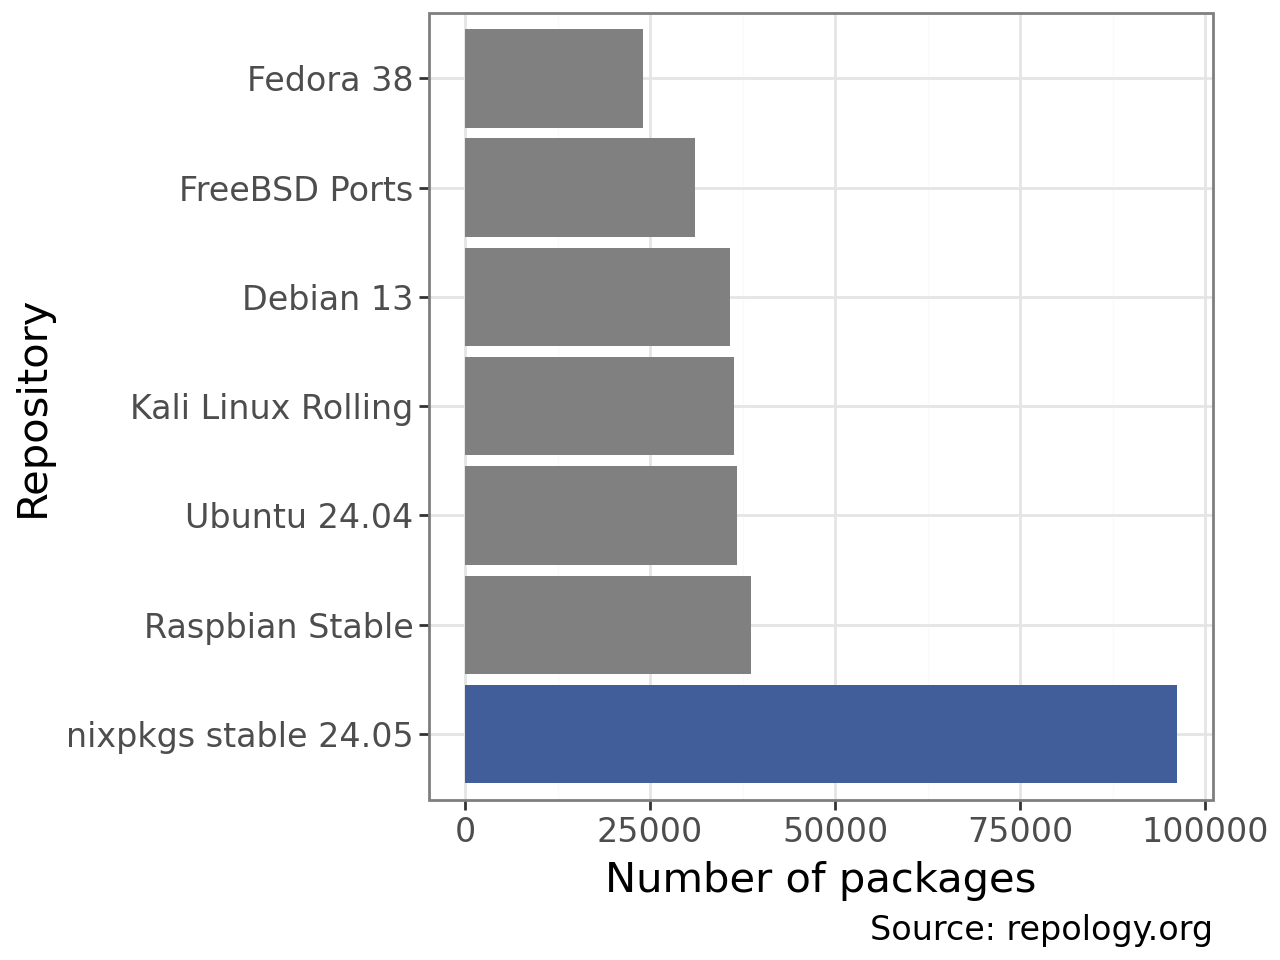

In [54]:
p  = (dp(df)
 .sort_values('Total', ascending=False)
 .filter_by(X['Repository'].str.lower().str.contains('nixpkgs stable 24.05|ubuntu 24.04$|raspbian stable|debian 13|kali linux rolling|freebsd ports|^fedora 38$'))
 #.sort_values('Total')
 .categorize('Repository')
 .assign(is_nixpkgs=X.Repository.str.lower().str.contains("nixpkgs").astype(str))

 .p9()
 .theme_bw(base_size=15)
 
 .scale_fill_manual(['grey', '#415e9aff'], guide=None)
 .add_bar('Repository', 'Total', fill='is_nixpkgs').coord_flip()
 .syc(name="Number of packages")
     ).pd
import plotnine as p9
p += p9.labs(caption="Source: repology.org")
 

(dp(p)
 .render("repo_sizes.png")

 #.hide_legend()
).pd